In [2]:
# Dependencies
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [3]:
#read ride data
csvpath = os.path.join('generated_data', 'ride_data.csv')
rider_data = pd.read_csv(csvpath)

csvpath2 = os.path.join('generated_data', 'city_data.csv')
city_data = pd.read_csv(csvpath2)

In [22]:
city_data.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [4]:
city_rider_data = pd.merge(rider_data, city_data, on=["city","city"], how="left")
city_rider_data.head()


,city,date,fare,ride_id,driver_count,type
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405,19,Urban
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576,15,Urban
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289,46,Urban
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691,40,Urban
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234,73,Urban


In [5]:
#Calculate the following
# Average Fare per City
# Total Number of Rides per City
# Total Number of Drivers per City
# City Type

In [6]:
urban_cities = city_rider_data[city_rider_data["type"] == "Urban"]
suburban_cities = city_rider_data[city_rider_data["type"] == "Suburban"]
rural_cities = city_rider_data[city_rider_data["type"] == "Rural"]

total_rides = (urban_cities['driver_count'])+(suburban_cities['driver_count'])+(rural_cities['driver_count'])
total_urban_rides = (urban_cities['driver_count'])
total_suburban_rides = (suburban_cities['driver_count'])
total_rural_rides = (rural_cities['driver_count'])


urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).count()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).count()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).count()["driver_count"]

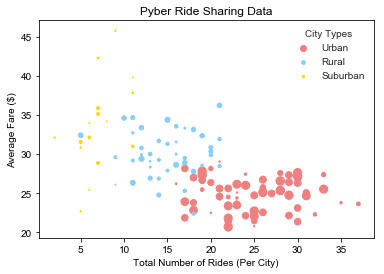

In [7]:
#scatter plots

urban_plot = plt.scatter(urban_ride_count,urban_avg_fare, s = total_urban_rides, c = 'lightcoral')
suburban_plot = plt.scatter(suburban_ride_count, suburban_avg_fare, s = total_suburban_rides, c = 'lightskyblue')
rural_plot = plt.scatter(rural_ride_count,rural_avg_fare, s = total_rural_rides, c = 'gold')

plt.style.use('seaborn-dark')
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend(['Urban','Rural','Suburban'],title = 'City Types')

plt.show()

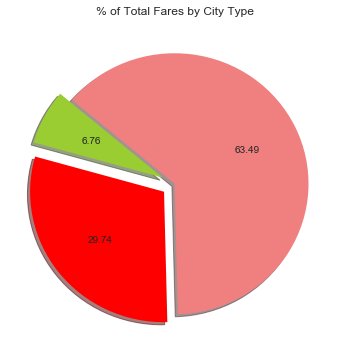

In [21]:
#% of Total Fares by City Type
cities_totals_fare= city_rider_data.groupby(["type"]).sum()["fare"]

colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
plt.pie(cities_totals_fare, explode=explode, colors=colors, 
        autopct='%.2f', shadow=True, startangle=140)
plt.title ('% of Total Fares by City Type')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

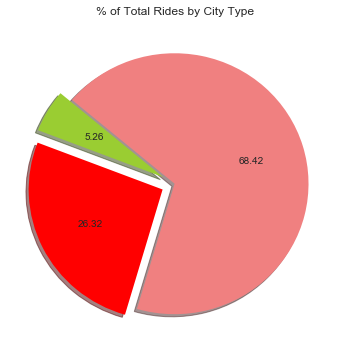

In [27]:
#% of Total Rides by City Type
cities_totals_ride= city_rider_data.groupby(["type"]).count()["ride_id"]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
plt.pie(cities_totals_ride, explode=explode, colors=colors, 
        autopct='%.2f', shadow=True, startangle=140)
plt.title ('% of Total Rides by City Type')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

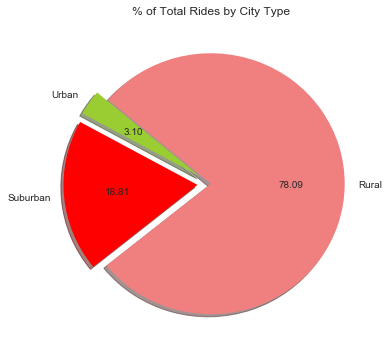

In [24]:
#% of Total Drivers by City Type
cities_totals_driver= city_data.groupby(["type"]).sum()["driver_count"]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0.1, 0.1, 0)
plt.pie(cities_totals_driver, explode=explode, colors=colors, labels=city_data['type'].unique(),
        autopct='%.2f', shadow=True, startangle=140)
plt.title ('% of Total Rides by City Type')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()